In [2]:
import pandas as pd

In [3]:
pd.__version__

'0.20.3'

In [4]:
pd.Series(['a', 'b', 'c'])

0    a
1    b
2    c
dtype: object

In [5]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([99999, 22222, 11111])
pd.DataFrame({'City name':city_names, 'Population':population})

,City name,Population
0,San Francisco,99999
1,San Jose,22222
2,Sacramento,11111


In [6]:
california_housing_dataframe = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv')
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FC2528C88>]], dtype=object)

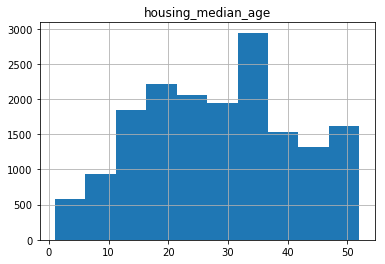

In [9]:
%matplotlib inline
california_housing_dataframe.hist('housing_median_age')

## 访问数据

In [10]:
cities = pd.DataFrame({'City name':city_names, 'Population':population})
cities['City name']

0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [11]:
cities['City name'][1]

'San Jose'

In [13]:
print(type(cities['City name']))
print(type(cities['City name'][1]))

<class 'pandas.core.series.Series'>
<class 'str'>


## 操控数据

您可以向 Series 应用 Python 的基本运算指令。例如：

In [14]:
population / 1000

0    99.999
1    22.222
2    11.111
dtype: float64

NumPy 是一种用于进行科学计算的常用工具包。pandas Series 可用作大多数 NumPy 函数的参数：

In [15]:
import numpy as np
np.log(population)

0    11.512915
1    10.008838
2     9.315691
dtype: float64

对于更复杂的单列转换，您可以使用 Series.apply。像 Python 映射函数一样，Series.apply 将以参数形式接受 lambda 函数，而该函数会应用于每个值。

下面的示例创建了一个指明 population 是否超过 100 万的新 Series：

In [16]:
population.apply(lambda val: val > 1000)

0    True
1    True
2    True
dtype: bool

In [18]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])

In [19]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Is wide and has saint name
0,San Francisco,99999,46.87,False
1,San Jose,22222,176.53,True
2,Sacramento,11111,97.92,False


## 索引

In [20]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [21]:
cities.index

RangeIndex(start=0, stop=3, step=1)

调用 DataFrame.reindex 以手动重新排列各行的顺序。

In [30]:
cities.reindex([2, 1, 0])

,City name,Population,Area square miles,Is wide and has saint name
2,Sacramento,11111,97.92,False
1,San Jose,22222,176.53,True
0,San Francisco,99999,46.87,False


In [26]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Is wide and has saint name
2,Sacramento,11111,97.92,False
0,San Francisco,99999,46.87,False
1,San Jose,22222,176.53,True


In [32]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Is wide and has saint name
0,San Francisco,99999.0,46.87,False
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
2,Sacramento,11111.0,97.92,False
